# **Gráficos com Matplotlib**
<hr>

O pacote Matplotlib é uma biblioteca gráfica para visualização de dados em Python. Ela é desenvolvida sobre arrays NumPy e uma das bibliotecas mais empregadas para visualização de dados em Python. Outros importantes  pacotes de visualização de dados como o Seaborn, Plotly, Altair que estendem a interface do Matplotlib. Por isso, é importante entender como produzir gráficos com o Matplotlib e é a biblioteca que usaremos na maior parte dos casos aqui. 

Neste capítulo você vai aprender como empregar o Matplotlib e criar gráficos a partir de dados simples. 

## Um gráfico de linha simples `plt.plot(x,y)`

Os gráficos de linha são os gráficos mais simples e, antes explorarmos outros tipos de gráficos, vamos entender como criar gráficos de linha com o Matplotlib e eles são particularmente úteis para apresentar gráficos de funções. 

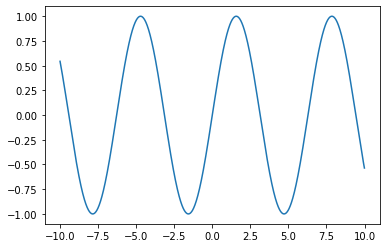

In [ ]:
import numpy as np

import matplotlib.pyplot as plt             
%matplotlib inline

x = np.arange(-10,10,0.01)

plt.plot(x, np.sin(x))
plt.show()

Acima você encontra primeiramente o `import` do pacote Matplotlib.  

Você pode empregar o Matplotlib basicamente em três contextos: usando o Matplotlib em um script; em um terminal IPython; ou ainda em um notebook IPython. Aqui, empregamos todas as execuções em notebook IPython ao usar o backend `inline`, seus gráficos matplotlib serão incluídos em seu notebook, juntamente com o código. A função `show()` concluí a exibição de um gráfico. Ela atua com o backend gráfico interativo do sistema e os detalhes de suas operações variam o contexto de execução. Basicamente ela procura os objetos ativos para a construção da figura abre uma ou mais janelas para exibir a saída dos gráficos. No caso de uma execução em notebooks IPython, ela exibirá figura abaixo na célula sem a numeração da célula `out[]` (Jupyter notebooks) ou texto de referência do objeto construído (Colab). Ela aparecer no final dos comandos gráficos e uma única vez.  

Você ainda pode adicionar títulos, rótulos aos eixos, legendas e alterar propriedades da linha como estilo e cor. 

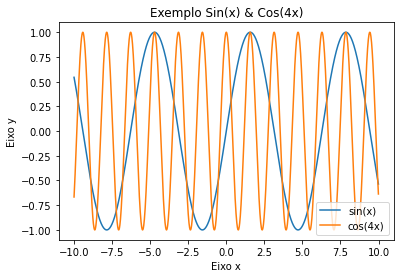

In [ ]:
import numpy as np

import matplotlib.pyplot as plt             
%matplotlib inline

x = np.arange(-10,10,0.01)

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(4*x), label='cos(4x)')

plt.title('Exemplo Sin(x) & Cos(4x)')
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.legend()

plt.show()

Note que gráficos das duas funções acimas são sobrepostos. Ao executar o comando `plot` existe uma única 'figura' ativa, e todos os comandos, como título, legendas e rótulos, são direcionados do mesmo modo que o `plot` para a mesma figura. A função `show()` se encarrega depois de combinar todos objetos ativos em uma única figura. Experimente inlcuir o `plt.show()` após o primeiro `plot` e veja o resultado.

## Empregando a interface direta ou de objetos `Script Layer` & `Artist Layer` 

Os comandos em Matplotlib podem ser empregados de duas formas. Na interface direta (Script Layer) o Matplotlib mantém o controle da figura e eixos 'atuais' onde as funções `plt` serão aplicadas. Essa é uma forma simples e útil, e vamos usá-la na maior parte do tempo. Essa é, entretanto, a forma complicada quando trabalhamos com múltiplos gráficos ou conjunto de gráficos com uma apresentação muito complexa. 

A interface orientada (Artist Layer) a objetos permite um melhor controle das figuras e deve ser preferida quando múltiplos gráficos ou figuras muito elaboradas são empregados. Nessa interface você pode apontar explicitamente a 'figura' e seus 'eixos', os gráficos contidos dentro de cada figura.

Compare os gráficos abaixo. O primeiro emprega a interface direta. Em uma figura com múltiplos gárficos, cada novo gráfico é ativado (`subplot(linhas, colunas, gráfico ativo)`) e todos os comandos `plt.` são então direcionados para o gráfico ativo. A execução seguinte emprega a interface orientada a objetos e os comando `plot` podem então serem direcionados explicitamente para cada gráfico (`ax[i]`).

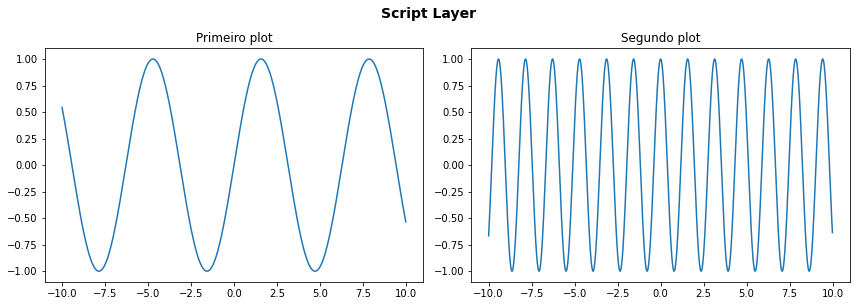

In [ ]:
plt.figure(figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Script Layer', fontsize=14, weight='bold', y=1.05)

# cria e ativa um gráfico na figura
plt.subplot(1, 2, 1) # (linhas, colunas, gráfico ativo)
plt.plot(x, np.sin(x))
plt.title('Primeiro plot')

# cria e ativa um segundo gráfico na figura
plt.subplot(1, 2, 2) # (linhas, colunas, gráfico ativo)
plt.plot(x, np.cos(4*x));
plt.title('Segundo plot')

plt.tight_layout()
plt.show()

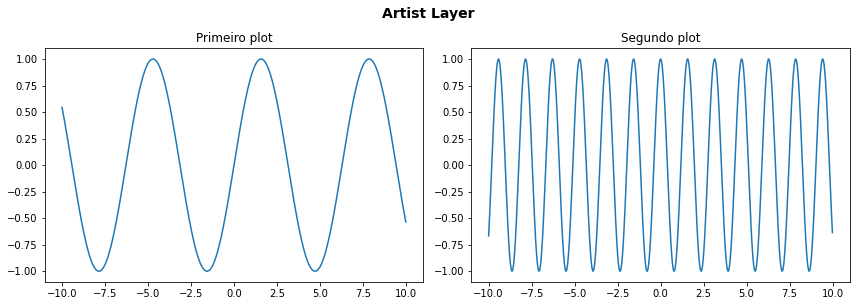

In [ ]:
# Cria uma grade de gráficos com 1 linha e 2 colunas de gráficos, ax é um vetor em que cada elemento corresponde a um gráfico da grade
fig, ax = plt.subplots(1,2,figsize=(12,4)) # cria uma figura alterando o tamanho, figsize=(tamanho_horizontal,tamanho_vertical)

plt.suptitle('Artist Layer', fontsize=14, weight='bold', y=1.05)

# Os comandos podem então ser direcionados para o gráfico específico
ax[0].plot(x, np.sin(x))
ax[0].set_title('Primeiro plot')

ax[1].plot(x, np.cos(4*x));
ax[1].set_title('Segundo plot')

plt.tight_layout()
plt.show()

Mais adiante você verá melhor como criar múltiplos gráficos. Por hora é importante que você entenda haver essas duas formas de trabalho do Matplotlib.

## Propriedades de linha `linestyle`, `marker`, `color`, `linewidth` e `markersize`

Você pode alterar várias das propriedades das linhas dos gráficos como estilo da linha, cor e sua espessura. Isso é importante para diferenciar várias linhas em um mesmo gráfico ou ainda se você quiser dar destaque a uma ou mais linhas. 

Essas propriedades podem ser codificadas explicitamente: 

```
plt.plot(x, np.cos(x), color='green', marker='o', linestyle='dashed', linewidth=1, markersize=6)
```

Ou de forma resumida:

```
plt.plot(x, np.cos(x), '--og', linewidth=1, markersize=6)
```

A expressão `'--og'` indica o `linestyle`, seguido do `marker` e do parâmetro `color`. Eles podem aparecer em qualquer ordem, uma vez que os símbolos de cada parâmetro não se repetem. As cores nesse modo ficam entretanto limitadas ao um conjunto de cores básicas `rgbcmyk` (`r`=red, `g`=green, ...). 

O esquema de cores é bastante sofisticado e permite empregar de cores básicas à tons de cinza, como também especificar valores de cada componente RGB (esquema de combinação de cores básicas Red, Green, Blue) e transparência de linhas (parâmetro `alpha`).

A seguir o primeiro gráfico mostra como empregar o uso dos parâmetros explícitos e de forma resumida, e o gráfico seguinte mostra como essas configurações podem ser empregadas para dar destaque a uma ou mais linhas em um gráfico. 

````{margin}
```{note}
Empregue diferentes estilos de linha para dar destaque a uma ou mais linhas em um gráfico.
```
````

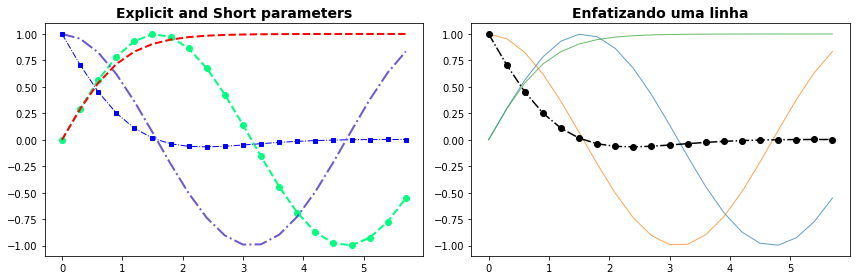

In [ ]:
x = np.arange(0, 6, 0.3)

fig = plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.title('Explicit and Short parameters', fontsize=14, weight='bold')
plt.plot(x, np.sin(x), color='springgreen', marker='o', linestyle='dashed', linewidth=2, markersize=6)
plt.plot(x, np.cos(x), color='slateblue', linestyle='dashdot', linewidth=2)

# short color code (rgbcmyk)
plt.plot(x, np.tanh(x), '--r', linewidth=2, markersize=6)
plt.plot(x, 1/np.exp(x)*np.cos(x), '-.sb', linewidth=1, markersize=4)

plt.subplot(1, 2, 2)
plt.title('Enfatizando uma linha', fontsize=14, weight='bold')
plt.plot(x, np.sin(x), linewidth=1, alpha=0.7)
plt.plot(x, np.cos(x), linewidth=1, alpha=0.7)
plt.plot(x, np.tanh(x), linewidth=1, alpha=0.7)
plt.plot(x, 1/np.exp(x)*np.cos(x), '-.ok')

plt.tight_layout()
plt.show()


Abaixo você encontra alguns exemplos e os estilos de linha, marcadores, cores básicas mais empregados. Eles são suficientes para os nossos propósitos, mas convido você a consultar a documentação do Matplotlib para uma relação completa desses parâmetros. Você também pode achar útil empregar referências resumidas (quick references ou cheat sheet) do Matplotlib que podem ser facilmente encontradas na internet. 

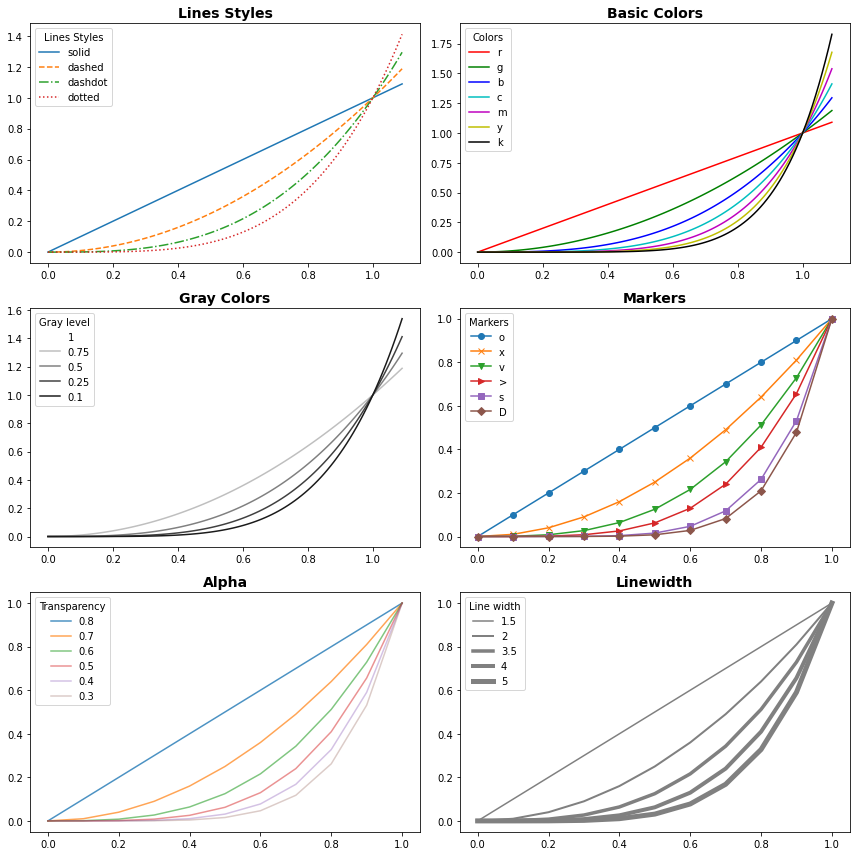

In [ ]:
x = np.arange(0.0, 1.1, 0.01)

fig = plt.figure(figsize=(12,12))

plt.subplot(3, 2, 1)
plt.title('Lines Styles', fontsize=14, weight='bold') # automatic colors
plt.plot(x, x**1, linestyle='solid', label='solid')
plt.plot(x, x**2, linestyle='dashed', label='dashed')
plt.plot(x, x**3, linestyle='dashdot', label='dashdot')
plt.plot(x, x**4, linestyle='dotted', label='dotted')
plt.legend(title='Lines Styles')

plt.subplot(3, 2, 2)
plt.title('Basic Colors', fontsize=14, weight='bold')
plt.plot(x, x**1, color='r', label='r')
plt.plot(x, x**2, color='g', label='g')
plt.plot(x, x**3, color='b', label='b')
plt.plot(x, x**4, color='c', label='c')
plt.plot(x, x**5, color='m', label='m')
plt.plot(x, x**6, color='y', label='y')
plt.plot(x, x**7, color='k', label='k')
plt.legend(title='Colors')

plt.subplot(3, 2, 3)
plt.title('Gray Colors', fontsize=14, weight='bold')
plt.plot(x, x**1, color='1', label='1')
plt.plot(x, x**2, color='0.75', label='0.75')
plt.plot(x, x**3, color='0.5', label='0.5')
plt.plot(x, x**4, color='0.25', label='0.25')
plt.plot(x, x**5, color='0.1', label='0.1')
plt.legend(title='Gray level')

x = np.arange(0.0, 1.1, 0.1) # para melhor exibição dos dados com markers

plt.subplot(3, 2, 4)
plt.title('Markers', fontsize=14, weight='bold')
plt.plot(x, x**1, marker='o', label='o')
plt.plot(x, x**2, marker='x', label='x')
plt.plot(x, x**3, marker='v', label='v')
plt.plot(x, x**4, marker='>', label='>')
plt.plot(x, x**6, marker='s', label='s')
plt.plot(x, x**7, marker='D', label='D')
plt.legend(title='Markers')

# o parâmetro alpha permite configurar um grau de transparência nas cores de linha
plt.subplot(3, 2, 5)
plt.title('Alpha', fontsize=14, weight='bold')
plt.plot(x, x**1, alpha=0.8, label='0.8')
plt.plot(x, x**2, alpha=0.7, label='0.7')
plt.plot(x, x**3, alpha=0.6, label='0.6')
plt.plot(x, x**4, alpha=0.5, label='0.5')
plt.plot(x, x**5, alpha=0.4, label='0.4')
plt.plot(x, x**6, alpha=0.3, label='0.3')
plt.legend(title='Transparency')

# empregando diferente espessuras de linha
plt.subplot(3, 2, 6)
plt.title('Linewidth', fontsize=14, weight='bold')
plt.plot(x, x**1, color='0.5', linewidth=1.5, label='1.5')
plt.plot(x, x**2, color='0.5', linewidth=2, label='2')
plt.plot(x, x**3, color='0.5', linewidth=3.5, label='3.5')
plt.plot(x, x**4, color='0.5', linewidth=4, label='4')
plt.plot(x, x**5, color='0.5', linewidth=5, label='5')
plt.legend(title='Line width')

plt.tight_layout()
plt.show()

## Textos: `title`, `labels`, `lengend` e `text`

Textos são um complemento importante de qualquer gráfico. Sem eles você não tem como saber exatamente ao que se refere cada eixo, sua escala ou sua unidade de medida. O título ainda pode explicitar a mensagem que deseja passar e anotações podem indicar pontos específicos do gráfico que se quer destacar. 

````{margin}
```{note}
Ao produzir um gráfico complemente com textos que ajudem a compreensão e comunicação. Eles são parte essencial dos gráficos. 
```
````

O Matplotlib, como outros pacotes de visualização, permite adicionar inúmeras anotações aos  gráficos como títulos, rótulos ou labels para as linhas, nomear os eixos ou até mesmo inserir uma anotação em uma posição específica do gráfico. Isso é muito importante para tornar claras as informações exibidas.



Abaixo você encontra como definir um título para o seu gráfico, nomear os eixos e como inserir rótulos (labels) para cada uma das linhas de um gráfico que emprega várias linhas. 
 
Esses títulos e rótulos aceitam todas as configurações comuns atribuídas a texto como tamanhos de fonte (`fontsize`), cor (`color`), estilos (como por exemplo `weight='bold'` e `style='italic'`). Para diferentes tipos de fonte é necessário modificar parâmetros à partir do `plt.rcParams` e você pode querer experimentar por exemplo `plt.rcParams["font.family"] = "fantasy"` ou um outro tipo de fonte. Para isso consulte a documentação do Matplotlib. Aqui manteremos sempre o uso da fonte padrão. 

Títulos podem ser alinhados no centro (padrão), à esquerda ou à direita usando o parâmetro `ha` (`horizontalalignment`). Você pode deixar para o Matplotlib definir a melhor posição da legenda ou empregar parâmetro de localização `loc` (`loc='upper right'`, `loc='lower left'`, `loc='center left'` etc.).



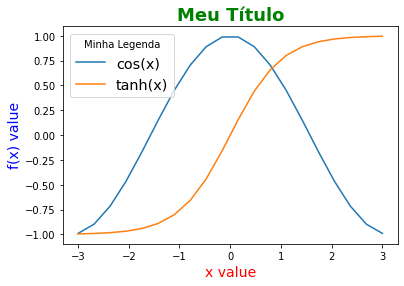

In [ ]:
x = np.linspace(-3, 3, 20)

plt.figure()

# Adicionando labels às diferentes linhas do gráfico
plt.plot(x, np.cos(x), label='cos(x)')
plt.plot(x, np.tanh(x), label='tanh(x)')

# Adicionando o Título
plt.title('Meu Título', color='green', fontsize=18, weight='bold', ha='center')

# Nomeando os eixos
plt.xlabel('x value', color='red', fontsize=14)
plt.ylabel('f(x) value', color='blue', fontsize=14)

# Exibindo a legenda
plt.legend(title='Minha Legenda', loc='best', fontsize='x-large')

plt.show()



Quando trabalhando com múltiplos gráficos você pode querer adicionar também um `suptitle` ao conjunto de gráficos. Empregamos isso em um exemplo anterior em que apresentamos o modo Artist Layer:

```
plt.suptitle('Artist Layer', fontsize=14, weight='bold', y=1.05)
``` 

O `y=1.05` coloca o `suptitle` 0.05 acima da figura e evita a sobre posição dos títulos. O comando `plt.tight_layout()`, no mesmo exemplo, ajusta o automaticamente o layout da figura para evitar sobreposições dos gráficos, como por exemplo dos textos dos eixos de um gráfico com outro.   

Anotações dentro de um gráfico são essencias quando se quer chamar a atenção do leitor para um determinado ponto do gráfico.

````{margin}
```{note}
Anotações dentro de um gráfico são essencias quando se quer chamar a atenção do leitor para um determinado ponto do gráfico.
```
````

Para isso o Matplotlib fornece duas funções, o `plt.text()` e o `plt.annotate()`. O primeiro simplesmente adiciona um texto em uma posição `x, y`, o segundo, insere o texto adicionando uma seta do texto a um ponto do gráfico. 

Pontos específicos dos gráficos podem ainda ser destacados, ou com o comando `plot()` destacando um ponto em coordenada específica, ou com a adição de linhas verticais (`vlines()`) ou horizontais (`hlines()`) informando a posição e os limites mínimo e máximo de cada linha.

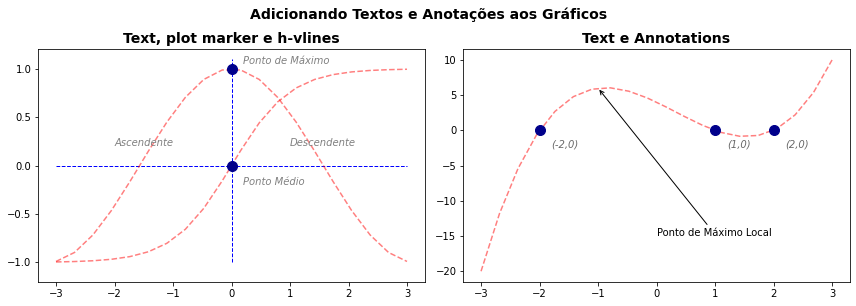

In [ ]:
x = np.linspace(-3, 3, 20)

fig = plt.figure(figsize=(12,4))
plt.suptitle('Adicionando Textos e Anotações aos Gráficos', fontsize=14, weight='bold', y=1.05)

plt.subplot(1, 2, 1)
plt.title('Text, plot marker e h-vlines', fontsize=14, weight='bold')
plt.plot(x, np.tanh(x), 'r--', alpha=0.5)
plt.plot(x, np.cos(x), 'r--', alpha=0.5)
plt.ylim([-1.2,1.2])

# Enfatizando um ponto específico do gráfico
plt.plot(0, 1, marker = 'o' , color = 'darkblue', markersize= 10)
plt.plot(0, 0, marker = 'o' , color = 'darkblue', markersize= 10)

# Adicionando anotações
plt.text(0 + 0.2, 0 - 0.2, 'Ponto Médio', style='italic', color='grey')
plt.text(0 + 0.2, 1 + 0.05, 'Ponto de Máximo', style='italic', color='grey')
plt.text(-2.0, 0.2, 'Ascendente', style='italic', color='grey')
plt.text(1, 0.2, 'Descendente', style='italic', color='grey')

# Adicionando linhas verticais e horizontais
plt.vlines(0, -1, 1.1, linestyle='dashed', color='b', linewidth=1) # vlines(posição, início, fim)
plt.hlines(0, -3, 3, linestyle='dashed', color='b', linewidth=1) # hlines(posição, início, fim)

plt.subplot(1, 2, 2)
plt.title('Text e Annotations', fontsize=14, weight='bold')
plt.plot(x, (x + 2) * (x - 1) * (x - 2), 'r--', alpha=0.5)

# Enfatizando vários pontos do gráfico
plt.plot([-2, 1, 2], [0, 0, 0], 'o', color='darkblue', markersize=10)

# Adicionando anotações
plt.text(-2 + 0.2, 0 - 2.4, '(-2,0)', style='italic', color='dimgrey')
plt.text(1 + 0.2, 0 - 2.4, '(1,0)', style='italic', color='dimgrey')
plt.text(2 + 0.2, 0 - 2.4, '(2,0)', style='italic', color='dimgrey')

# Annotate
plt.annotate('Ponto de Máximo Local', 
             xy=(-1, 6),                # ponto do gráfico
             xytext=(0, -15),           # posição do texto
             arrowprops=dict(arrowstyle="->")) 

plt.tight_layout()                    
plt.show()


E uma outra forma útil de destaque nos graficos pode ser preencher áreas sob o gráfico. Para isso você pode pode empregar `plt.fill_between(x,y)`, para preencher a área sob um gráfico, ou ainda `plt.fill_between(x,y,linha-média)` para preencher a área entre o gráfico e uma linha média. O padrão para linha média é 0.

````{margin}
```{note}
Gráficos de distribuição de probabilidade PDF e CDF. Este é um item avançado e está aqui apenas para ilustrar um uso comum de áreas sob curvas.
```
```` 

Se você conhece de distribuições de probabilidade, você pode ainda reconhecer os gráficos de densidade de probabilidade (PDF) e probabilidade acumulada (CDF)de uma distribuição normal com média $0$ e desvio padrão $1$. A probabilidade $P(x \le -0.5)$  é dada pela área sob a curva do gráfico de densidade de probabilidade no intervalo de $[0, -0.5]$, ou diretamente pela pelo gráfico de distribuição de probabilidade acumulada.  

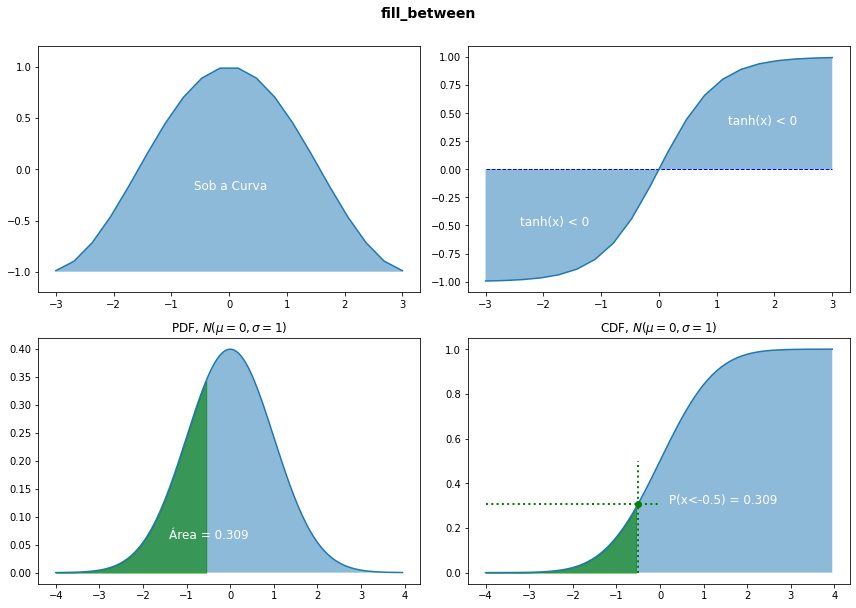

In [ ]:
x = np.linspace(-3, 3, 20)

fig = plt.figure(figsize=(12,8))
plt.suptitle('fill_between', fontsize=14, weight='bold', y=1.05)

plt.subplot(2, 2, 1)
plt.plot(x, np.cos(x))

# Fill
plt.fill_between(x, np.cos(x), -1, alpha=0.5)

# Adicionando anotações
plt.text(-0.6, -0.2, 'Sob a Curva', color='white', fontsize=12)
plt.ylim([-1.2,1.2])

plt.subplot(2, 2, 2)
plt.plot(x, np.tanh(x))

# Fill
plt.fill_between(x, np.tanh(x), alpha=0.5)

# Adicionando anotações
plt.text(-2.4, -0.5, 'tanh(x) < 0', color='white', fontsize=12)
plt.text(1.2, 0.4, 'tanh(x) < 0', color='white', fontsize=12)
# hline
plt.hlines(0, -3, 3, linestyle='dashed', color='b', linewidth=1)

# apenas para construção dos dados de uma distribuição normal
#-------------------------------------------------------------------------------
from scipy.stats import norm 
pdf = []
cdf = []
for a in np.arange(-4,4,0.05):
  pdf.append(norm.pdf(a))
  cdf.append(norm.cdf(a))  

plt.subplot(2, 2, 3)
plt.title('PDF, $N(\mu=0, \sigma=1)$',fontsize=12)
plt.plot(np.arange(-4,4,0.05),pdf)

# Fill
plt.fill_between(np.arange(-4,4,0.05), pdf, alpha=0.5)    
plt.fill_between(np.arange(-4,-0.5,0.05), pdf[0:len(np.arange(-4,-0.5,0.05)+1)], color='g', alpha=0.6) 

# Adicionando anotações
plt.text(-1.4, 0.06, f'Área = { norm.cdf(-0.5) :.3f}',fontsize=12, color='white')

plt.subplot(2, 2, 4)
plt.title('CDF, $N(\mu=0, \sigma=1)$',fontsize=12)
plt.plot(np.arange(-4,4,0.05),cdf)

# Fill
plt.fill_between(np.arange(-4,4,0.05), cdf, alpha=0.5)    
plt.fill_between(np.arange(-4,-0.5,0.05), cdf[0:len(np.arange(-4,-0.5,0.05)+1)], color='g', alpha=0.6) 

# Adicionando anotações
plt.vlines(-0.5,0,max(cdf)-max(cdf)/2,linewidth=2,linestyle=':',colors='g') 
plt.hlines(norm.cdf(-0.5), -4, 0, linewidth=2,linestyle=':',colors='g')  
plt.plot(-0.5,norm.cdf(-0.5),'go')

plt.text(0.2, norm.cdf(-0.5), f'P(x<-0.5) = { norm.cdf(-0.5) :.3f}',fontsize=12, color='white')



plt.tight_layout()                    
plt.show()


## Limite dos eixos e escalas `xlim`, `ylim` e `ticker`

O Matplotlib ajusta automaticamente os limites dos valores dos eixos x e y e as escalas empregadas. Muitas vezes, entretanto, esses valores não são os mais adequados para os seus propósitos e você pode querer alterá-los. O limites dos valores podem ser definidos empregando as funções `xlim` e `ylim`. 

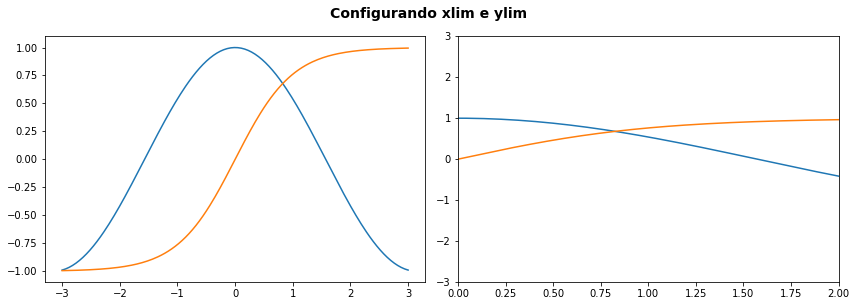

In [ ]:
x = np.linspace(-3, 3, 200)

fig = plt.figure(figsize=(12,4))
plt.suptitle('Configurando xlim e ylim', fontsize=14, weight='bold', y=1.05)

plt.subplot(1,2,1)
plt.plot(x, np.cos(x))
plt.plot(x, np.tanh(x))

plt.subplot(1,2,2)
plt.plot(x, np.cos(x))
plt.plot(x, np.tanh(x))
plt.xlim([0,2])
plt.ylim([-3,3])

plt.tight_layout()
plt.show()

A modificação da régua dos eixos (a escala) é um pouco mais trabalhosa. Ela pode ser feita melhorempregando a interface orientada a objeto (Artist Layer), exigindo ainda o uso da classe `ticker` e dos métodos de eixo `x|y axis.set_major_locator`. O primeiro gráfico da figura anterior encontra-se abaixo com as escalas alteradas em duas formas diferentes.

Mas esse é um recurso avançado e, para maior parte dos casos o ajuste automático do Matplotlib é suficiente.

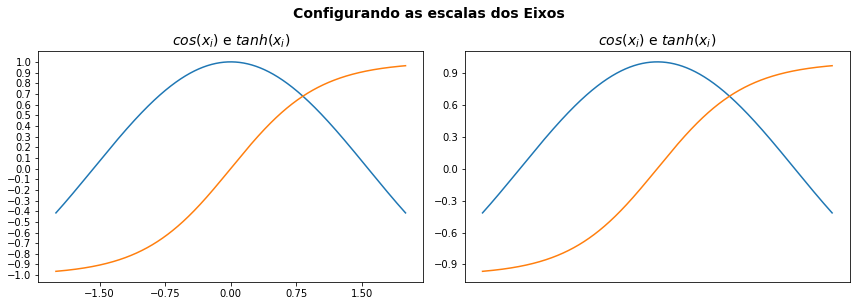

In [ ]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(1,2,figsize=(12,4))
plt.suptitle('Configurando as escalas dos Eixos', fontsize=14, weight='bold', y=1.05)

# Mais pontos gerados para exibir diferentes réguas de dados nos eixos
x = np.linspace(-2, 2, 10000)

ax[0].set_title('$cos(x_i)$ e $tanh(x_i)$', fontsize=14)
ax[0].plot(x, np.cos(x))
ax[0].plot(x, np.tanh(x))

# Definindo o intervalo dos valores a serem exibidos nos eixos 
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(0.75))
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.1))

ax[1].set_title('$cos(x_i)$ e $tanh(x_i)$', fontsize=14)
ax[1].plot(x, np.cos(x))
ax[1].plot(x, np.tanh(x))

# Suprimindo a régua de valores no eixo x
ax[1].xaxis.set_major_locator(ticker.NullLocator())

# Definindo a quantidade de pontos a ser exibida na régua
ax[1].yaxis.set_major_locator(ticker.MaxNLocator(8))

plt.tight_layout()
plt.show()


E você ainda pode querer compartilhar as escalas dos eixos x e y no caso de vários plots deixando mais limpa a exibição dos gráficos. Para isso, empregue os parâmetros `sharex` ou `sharey`  na função `subplots` conforme escala do eixo que deseja compartilhar. No exemplo abaixo ainda inserimos uma 'grade' ao gráfico apenas para apresentar mais esse recurso.

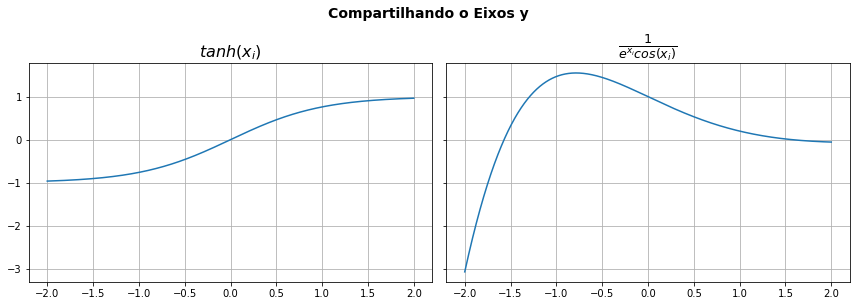

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4), sharey=True, sharex=True)
plt.suptitle('Compartilhando o Eixos y', fontsize=14, weight='bold', y=1.05)

# Mais pontos gerados para exibir diferentes réguas de dados nos eixos
x = np.linspace(-2, 2, 10000)

ax[0].set_title('$tanh(x_i)$', fontsize=16)
ax[0].plot(x, np.tanh(x))
ax[0].grid()

ax[1].set_title('$\\frac{1}{e^{x_i} cos(x_i)}$', fontsize=18)
ax[1].plot(x, 1/np.exp(x)*np.cos(x))
ax[1].grid()

plt.tight_layout()
plt.show()

Nos dois últimos exemplos, diferente dos exemplos anteriores, você deve ter notado que empregamos a interface orientada a objetos no lugar da interface direta e que comando para inserir o título dos gráficos é ligeiramente diferente da forma que empregamos antes.

Ao empregar a interface orientada a objetos as funções para se definir limites, rótulos e títulos diferem ligeiramente das funções empregadas na interface direta. 

A maior parte das funções `plt` pode ser aplicada diretamente como métodos de eixo (por exemplo `plt.plot() → ax.plot()`) mas os comandos para definir limites, rótulos e títulos diferem ligeiramente quando empregamos a interface orientada a objeto adicionando-se o prefixo `set_` aos comandos: 

> ``plt.title()`` → ``ax.set_title()``

> ``plt.xlabel()``  → ``ax.set_xlabel()``

> ``plt.ylabel()`` → ``ax.set_ylabel()``

> ``plt.xlim()``  → ``ax.set_xlim()``

> ``plt.ylim()`` → ``ax.set_ylim()``

```{warning}
``plt.title()`` → ``ax.set_title()``, assim como outros comandos tem uma sintaxe diferente nos modos Script e Artist Layer.
```

E o comando `ax.set()` ainda pode ser empregado para definir todas essas propriedades simultaneamente.

Você pode ter notado também que empregamos em alguns títulos os símbolos `$`. Se você está familiarizado com a notação $\LaTeX$ para símbolos e expressões matemáticas você poderá empregar essa notação nos textos do Matplotlib que é particularmente elegante para expressões que envolvem símbolos matemáticos como $\pi$, $\alpha$, $\lambda$, $\ge$, $\neq$, $\subseteq$, funções como $f(x)$, $\sigma(x)$, $\omega(x)$, $\cos(\theta)$ ou ainda expressões mais complexas como:

$$e = \mathop {\lim }\limits_{n \to \infty } \left( {1 + \frac{1}{n}} \right)^n$$

## Empregando Estilos

Como outros pacotes de visualização o Matplotlib implementa um 'estilo' e uma série de padrões aos gráficos. Isso permite que você não precise definir todas as configurações e propriedades, como cores, espessura das linhas, o tamanho das fontes etc. adotando a configuração padrão e alterando somente os elementos que são de interesse.

Existem vários estilos predefinidos fornecidos pelo Matplotlib. 


In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Por exemplo, o estilo 'ggplot' emula a estética do ggplot, um importante pacote de visualização da linguagem R. Para usar esse estilo, basta empregar:

```
plt.style.context('ggplot') 
```
para empregar esse estilo para todos os gráficos, ou ainda:

```
with plt.style.context('stylename'):
  <seu plot> 
```
para configurar temporariamente um estilo. 

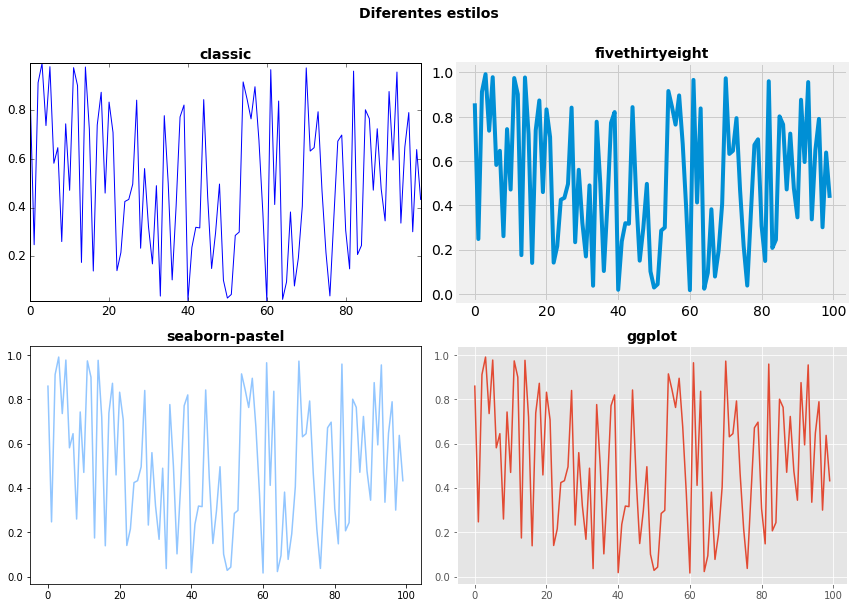

In [ ]:
# apenas a produção dos dados
x = np.random.random_sample(100)

plt.figure(figsize=(12,8))                         
plt.suptitle('Diferentes estilos', fontsize=14, weight='bold', y=1.05)

i = 1
for style in ['classic','fivethirtyeight','seaborn-pastel','ggplot']:
  with plt.style.context(style):
    plt.subplot(2, 2, i)  
    plt.plot(x)     
    plt.title(style, fontsize=14, weight='bold')    
    i = i + 1                   

plt.tight_layout()
plt.show()

plt.style.context('default')
plt.show()

`plt.rcParams` é um arrey que contem todos parâmetros da sessão e você pode empregar:
```
print(plt.rcParams)
```
para verificar todos os parâmetros, ou:
```
print(plt.rcParams.get( <parâmetro> ))
```
para recuperar um parâmetro específico. 

In [ ]:
print(list(plt.rcParams)[10:15])   # somente 5 os primeiros parâmetros
 
print(plt.rcParams.get('lines.linewidth'))
print(plt.rcParams.get('lines.color'))
print(plt.rcParams.get('font.size'))

['animation.ffmpeg_path', 'animation.frame_format', 'animation.html', 'animation.html_args', 'animation.writer']
1.5
C0
10.0


Esses parâmetros, que valem para toda a sessão, também podem ser alterados. Uma boa prática é salvar os parâmetros padrão antes de alterá-los.

In [ ]:
import matplotlib.pyplot as plt

# save rcParams
IPython_default = plt.rcParams.copy()

plt.rc('lines', linewidth=2, color='r')

# que é o mesmo que:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'

plt.rc('font', size=12)  

print(plt.rcParams.get('lines.linewidth'))
print(plt.rcParams.get('lines.color'))
print(plt.rcParams.get('font.size'))

# reset rcParams
plt.rcParams = IPython_default

print(plt.rcParams.get('lines.linewidth'))
print(plt.rcParams.get('lines.color'))
print(plt.rcParams.get('font.size'))


2.0
r
12.0
1.5
C0
10.0


## Salvando os Gráficos em um Arquivo

Salvar os gráficos para uso em algum outro documento, como uma página web, um relatório ou uma apresentação é muitas vezes importante. O comando `savefig()` permite salvar seus gráficos em uma série de formatos como .JPG, .PNG, .PDF ou .SVG. O parâmetro `savefig.dpi` pode ser empregado para aumentar a resolução e qualidade da imagem produzida.

````{margin}
```{note}
Empregue `plt.savefig( <arquivos>.JPG|PNG|PDF|SVG )` para salvar os gráficos em arquivos no diretório de trabalho do Python.
```
````


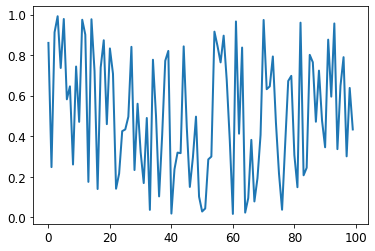

In [ ]:
plt.rcParams['savefig.dpi'] = 300

plt.plot(x)

plt.savefig('my_plot.png')
plt.savefig('my_plot.pdf')

plt.show()



Nos comandos acima os arquivos serão criados no diretório de trabalho corrente do Python. Se você estiver empregando o Google Colab os comandos abaixo listam o diretório corrente e os arquivos gerados. 

In [ ]:
!pwd
!ls 

/content
my_plot.pdf  my_plot.png  sample_data


## Consultado a documentação do Matplotlib

O https://matplotlib.org é a referência geral do Matplotlib e os links exatos de cada recurso podem variar de versão para versão. Mas você pode achar útil consultar os seguintes links:

````{margin}
```{note}
Acesse https://matplotlib.org. 
```
````

https://matplotlib.org/stable/gallery/index.html 
https://matplotlib.org/stable/tutorials/index.html

Além da consulta de recursos específicos. 

## Outros gráficos

Muitos outros gráficos, além do gráfico de linhas, podem ser produzidos com o Matplotlib. Alguns desses gráficos encontram-se abaixo e você pode notar que eles compartilham muitas coisas em comum com os gráficos de linha como os modos Script e Artist Layers, as configurações de títulos, rótulos e legendas, os subplots etc. De fato eles irão diferir apenas no que se refere a propriedade específica de cada diferente gráfico e, por isso, essa introdução é importante para a construção de quaisquer gráficos que você deseje construir e nos capítulos seguintes você irá aprender mais sobre o cada um desses gráficos e seus propósitos. 

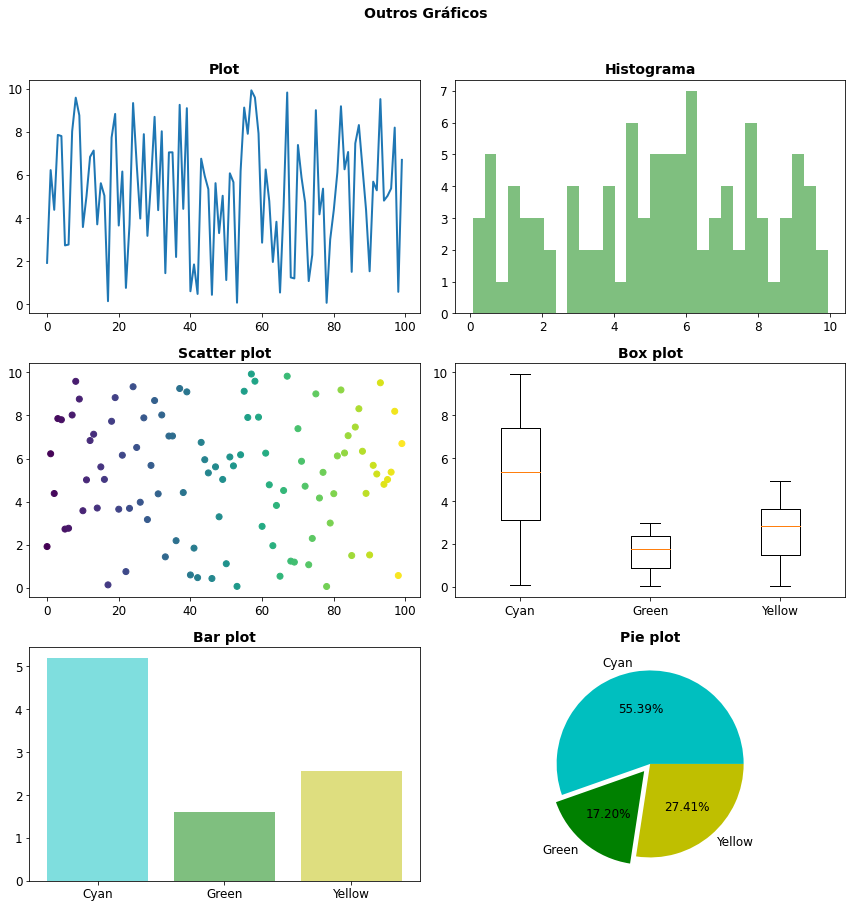

In [ ]:
# apenas a produção dos dados
x = np.random.random_sample(100)
np.random.seed(1234)

x = np.arange(0,100,1)
y = np.random.rand(100)*10
z = np.random.rand(100)*3
t = np.random.rand(100)*5

from matplotlib import cm # para cores no scatter plot

plt.figure(figsize=(12,12))                         
plt.suptitle('Outros Gráficos', fontsize=14, weight='bold', y=1.05)

plt.subplot(3, 2, 1)  
plt.plot(x,y)    
plt.title('Plot', fontsize=14, weight='bold') 

plt.subplot(3, 2, 2)  
plt.hist(y, bins=30, color='g', alpha=0.5)     
plt.title('Histograma', fontsize=14, weight='bold')    
             
plt.subplot(3, 2, 3)  
plt.scatter(x,y,c=x,cmap=cm.viridis)    
plt.title('Scatter plot', fontsize=14, weight='bold') 

plt.subplot(3, 2, 4)  
plt.boxplot([y,z,t],labels=['Cyan','Green','Yellow'])    
plt.title('Box plot', fontsize=14, weight='bold')

plt.subplot(3, 2, 5)  
plt.bar(['Cyan','Green','Yellow'],[y.mean(),z.mean(),t.mean()],color=['c','g','y'],alpha=0.5)    
plt.title('Bar plot', fontsize=14, weight='bold')

plt.subplot(3, 2, 6)  
plt.pie([y.mean(),z.mean(),t.mean()],
        colors=['c','g','y'],
        explode=[0, 0.1, 0],
        labels=['Cyan','Green','Yellow'],
        autopct='%1.2f%%')    
plt.title('Pie plot', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


# Seaborn

O Seaborn é uma biblioteca de visualização construída sobre o Matplotlib. Em princípio ela busca implementar uma interface de mais alto nível para as visualizações de dados. Sendo construída sobre o Matplotlib ela compartilha uma série de comandos com o Matplotlib. É uma boa opção para gráficos simples e padronizados, mas o Matplotlib dá mais flexibilidade e em geral, mesmo empregando o Seaborn, você irá precisar empregar os comandos do Matplotlib em conjunto com o Seaborn.

Os gráficos criados acima com Matplotlib estão criados abaixo com o Seaborn. A tradução é bastante direta. Não empregamos abaixo múltiplos plots. Para algumas funções simples como o `lineplot()` o Seaborn aceita o esquema de múltiplos plots do Matplotlib (por ex, `plt.subplot(nrow, ncol, pos)`), mas para algumas funções como o `displot()` não, e requer o uso de um esquema próprio de subplots. Não vamos tratar isso aqui nessa introdução.

Note ainda que não temos o *pie* plot no Seaborn. De fato esse é um gráfico cada vez menos recomendad.

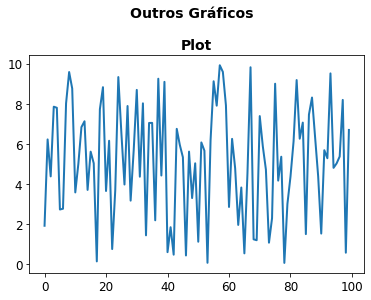

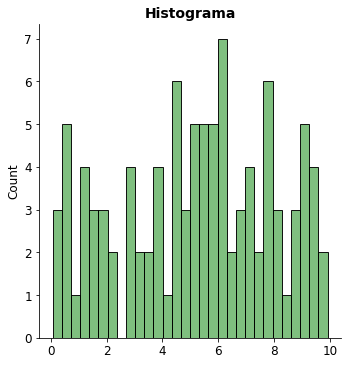

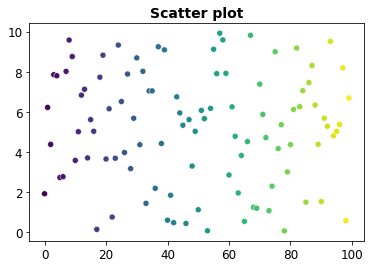

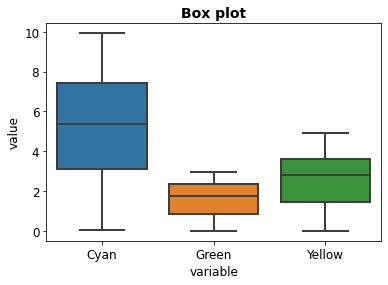

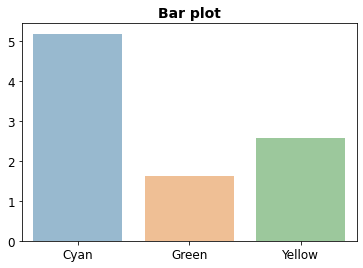

AttributeError: ignored

In [ ]:
import seaborn as sns

# apenas a produção dos dados
x = np.random.random_sample(100)
np.random.seed(1234)

x = np.arange(0,100,1)
y = np.random.rand(100)*10
z = np.random.rand(100)*3
t = np.random.rand(100)*5

from matplotlib import cm # para cores no scatter plot

plt.suptitle('Outros Gráficos', fontsize=14, weight='bold', y=1.05)

sns.lineplot(x=x,y=y)                                        # x= e y= para evitar warnings....
plt.title('Plot', fontsize=14, weight='bold') 
plt.show()

sns.displot(y, bins=30, color='g', alpha=0.5)                # para subplots somente aceite facegrid, um recurso avançado para múltiplos plots
plt.title('Histograma', fontsize=14, weight='bold')
plt.show()    
             
sns.scatterplot(x=x,y=y,c=x,cmap=cm.viridis)                 # x= e y= para evitar warnings....
plt.title('Scatter plot', fontsize=14, weight='bold') 
plt.show()

box = pd.DataFrame({'Cyan':y,'Green':z,'Yellow':t})          # boxplot para ser simples requer um dataframe   
sns.boxplot(x='variable', y='value', data=pd.melt(box))      
# or
# sns.boxplot(data=box)  
plt.title('Box plot', fontsize=14, weight='bold')
plt.show()

sns.barplot(x=['Cyan','Green','Yellow'],y=[y.mean(),z.mean(),t.mean()],alpha=0.5)   # x= e y= para evitar warnings.... 
plt.title('Bar plot', fontsize=14, weight='bold')
plt.show()

# sns.pie()                                                  # não temos pie plot no seaborn



## Um Gráfico Final

Como um exemplo final você pode verificar vários desses recursos empregados para exibir os valores normalizados do SP500 (índice da bolsa americana) e do Ibovespa (bolsa de São Paulo), destacando os impactos da Pandemia de Covid-19  ao longo do período de 2020-01-01 a 2021-04-01. Você pode empregar esse código como modelo adaptando-o para criar os gráficos do seu interesse.

                  SP500      IBOV
Date                             
2020-01-02  3257.850098  118573.0
2020-01-03  3234.850098  117707.0
2020-01-06  3246.280029  116878.0
2020-01-07  3237.179932  116662.0
2020-01-08  3253.050049  116247.0


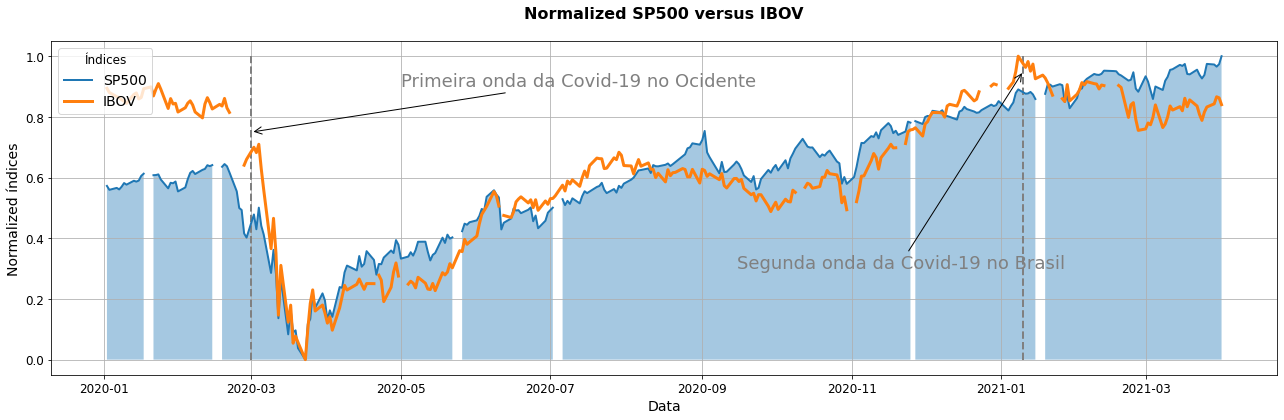

In [ ]:
import datetime
import pandas as pd

# Obtendo os  dados
#-------------------------------------------------------------------------------
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/sp500_ibov.csv',
                 index_col=0,         # read dates como index
                 parse_dates=True)
print(df.head())
df=(df-df.min())/(df.max()-df.min()) # normalizando os valores

# Gráficos
#-------------------------------------------------------------------------------
plt.figure(figsize=(18,6))                         
plt.title('Normalized SP500 versus IBOV', fontsize=16, weight='bold', y=1.05)

plt.plot(df['SP500'], label='SP500')
plt.plot(df['IBOV'], label='IBOV',linewidth=3)

# Ornamentos
#-------------------------------------------------------------------------------

# Annotate
plt.annotate('Primeira onda da Covid-19 no Ocidente', 
             xy=(datetime.datetime(2020, 3, 1), 0.75),  # ponto do gráfico
             xytext=(datetime.datetime(2020, 5, 1), 0.9),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=18,
             color='grey')  

plt.annotate('Segunda onda da Covid-19 no Brasil', 
             xy=(datetime.datetime(2021, 1, 10), 0.95),  # ponto do gráfico
             xytext=(datetime.datetime(2020, 9, 15), 0.3),   # posição do texto
             arrowprops=dict(arrowstyle="->"),
             fontsize=18,
             color='grey')              

# Linhas verticais
plt.vlines(datetime.datetime(2020, 3, 1),0,1,linewidth=2,linestyle='--',colors='grey') 
plt.vlines(datetime.datetime(2021, 1, 10),0,1,linewidth=2,linestyle='--',colors='grey') 

# Fill
plt.fill_between(df.index, y1=df['SP500'], y2=0, alpha=0.4)    

# Add grid
plt.grid()

# Labels
plt.xlabel('Data',fontsize=14)
plt.ylabel('Normalized índices',fontsize=14)

# Legenda
plt.legend(title='Índices',loc='upper left',fontsize=14)

# Finaliza
plt.tight_layout()                    
plt.show()

# Exercícios

# Q1. Para cada uma das funções abaixo: 

$$ y(t) = e^{-t} $$
$$ y(t) = e^{-t} cos(2 \pi t) $$
$$ y(t) = e^{-|t|} sin(t) $$

crie um gráfico da função no intervalo $ t \in [-10,10]$ (você pode empregar `t = np.arange(-10,10,0.01)`).

* a. Qual o menor e maior valor das funções nesse intervalo?
* b. Quais das funções são monotônicas no intervalo?



# Q2. Alterando o script anterior...

* a. **Todas as funções no mesmo gráfico**. Altere o script anterior para exibir todas as funções em um mesmo gráfico. Adicione labels a cada uma das linhas.

> A partir de que valor as funções 'parecem' convergir?

* b. **Múltiplos Gráficos (Script Layer)**. Empregando a interface direta do Matplotlib (modo *script layer*). Altere o script anterior para exibir todos os 3 gráficos em mesma figura arranjados lado a lado, como abaixo. Adicione título a cada gráfico.

* c. **Múltiplos Gráficos (Artist Layer)**. Empregando a interface de objetos do Matplotlib (modo *script layer*). Altere o script anterior para exibir todos os 3 gráficos em mesma figura arranjados lado a lado, como abaixo. 

> Compartilhe o eixo y dos gráficos. Faz sentido compartilhar os eixos aqui? 


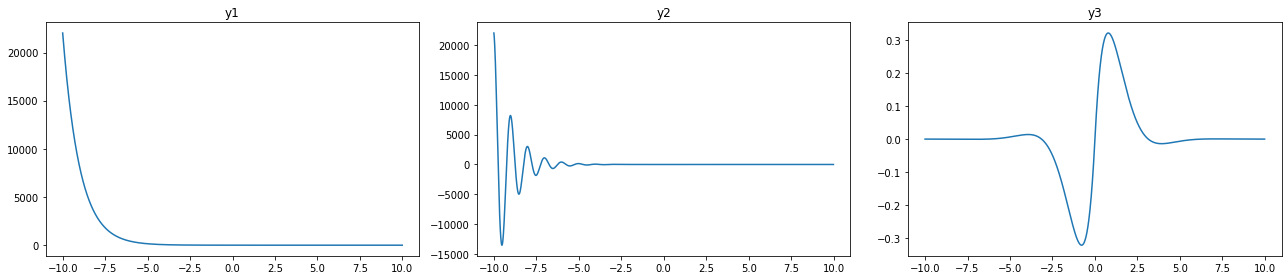

# Q3. Analisando dados da Bolsa de Valores

Empregue o conjunto de dados abaixo. Exiba em um mesmo gráfico os valores dos índices Bovespa e da PETR4 para todo o período.

* a. Depois de fazer um gráfico simples, empregue `ax.xaxis.set_major_locator(ticker.MaxNLocator(10))` (ver no material de teoria) para um número menor de datas. Você também pode ajudar o tamanho da figura, por exemplo para `figsize=(12,4)`.

> Você consegue observar nesse gráfico a mesma tendência dos valores ao longo da Pandemia de Covid?

* b. Crie o gráfico anterior normalizando os valores.

> Você consegue agora observar melhor a tendência dos dados? É basicamente a mesma? 
 


In [ ]:
import pandas as pd
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/bovespa2020_2021.csv')
df.head()

data      IBOV  VALE3      PETR4   DOLAR
0  2020-01-02  118573.0  13.45  16.270000  4.0163
1  2020-01-03  117707.0  13.29  15.990000  4.0234
2  2020-01-06  116878.0  13.14  16.219999  4.0570
3  2020-01-07  116662.0  13.23  16.059999  4.0604
4  2020-01-08  116247.0  13.22  15.700000  4.0662

# Q4. Linhas horizontais e verticais

Faça um gráfico da terceira função,

$$ y(t) = e^{-|t|} sin(t) $$

Indicando com uma linha traceja em vermelho o seu ponto de mínimo e escreva 'Ponto de Mínimo'. 



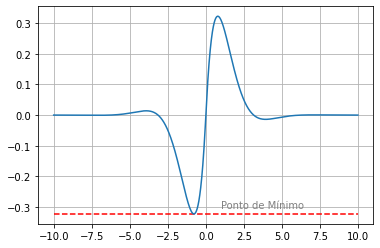

# Q5. *Log Scale*

**Pesquise**. Exiba as 3 funções no mesmo gráfico empregando uma escala de log para o eixo $y$ (mas sem alterar os valores diretamente, altere o gráfico!). 

Existem centenas de opções para se fazer isso. Procure e apresente a sua alternativa. 

**DICA**: a soluções mais simples parece ser empregar o modo artist layer.


# Q6. Despolarização neural!!!

Empregue o dataset `dots`. Quanto aproximadamente dura **despolarização** de um neurônio (tipo = choice 'T2' e align 'dots'). 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Action_potential.svg/300px-Action_potential.svg.png" width=300, align="center"> 

In [ ]:
import seaborn as sns
df = sns.load_dataset('dots')
df.head()


align choice  time  coherence  firing_rate
0  dots     T1   -80        0.0    33.189967
1  dots     T1   -80        3.2    31.691726
2  dots     T1   -80        6.4    34.279840
3  dots     T1   -80       12.8    32.631874
4  dots     T1   -80       25.6    35.060487